In [54]:
import os

import getpass
from pathlib import Path, PureWindowsPath # please check this medium article!! https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f



if getpass.getuser() == 'Konrad':
    project_dir = Path(PureWindowsPath('D:\\DeepLearningProject'))
elif getpass.getuser() == 'fruechtnicht':
    project_dir = Path('/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir')
else:
    raise ValueError('Check you own user name and add proper elif statement !!!')
# if you have a windows computer please specify your project path as Konrad, if not as fruechtnicht
print(project_dir)
print(os.chdir(project_dir/ Path('log')))

/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir
None


In [57]:
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : /Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir/log


In [85]:
targets = [
            #'etchnic'
            #, 
            #'gender'
            #,
            'age'
            ]

In [87]:
import pandas as pd 
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(24,16)})
sns.set_style("white")
sns.set_palette("Reds")

variables = ['nr_of_channel', 'kernel_size', 'stride', 'hidden_neurons']

for target in targets:
    
    for variable in variables:
        final = pd.DataFrame()
        for file in glob.glob("*testing_"+target+"_"+variable+"_*"):
            seed = re.search("\d(?=(_training\.csv))", file).group(0)  
            value = re.search("\d*(?=(_\d*_training\.csv))", file).group(0)  
            variable = re.search("(?<="+target+"_).*(?=(_\d*_\d*_training\.csv))", file).group(0)  
            df = pd.read_csv(file)
            df[variable]= int(value)
            df['seed']= int(seed)
            final = pd.concat([final,df], axis=0)
            
            if target == 'age':
                metric = 'val_mean_absolute_error'
            else: 
                metric = 'val_acc'
    

            n_colors = len(final[variable].unique())
            palette = sns.color_palette("hls",n_colors)


            ax = sns.lineplot(x="epoch", y=metric, data=final, hue=variable, linewidth=5.0,legend="full", palette=palette)
            ax.set_title('Performance with different '+variable+ " for "+target, fontsize=25)
            ax.legend(frameon=False, loc='lower center',ncol=2, fontsize=20)
            ax.set_xlabel("Epoch",fontsize=20)
            ax.set_ylabel(metric,fontsize=20)
            ax.tick_params(labelsize=18)
            ax.legend(loc='best',fontsize='xx-large')
            fig = ax.get_figure()
            plt.savefig(variable+'_'+target+'.png')
            plt.close()



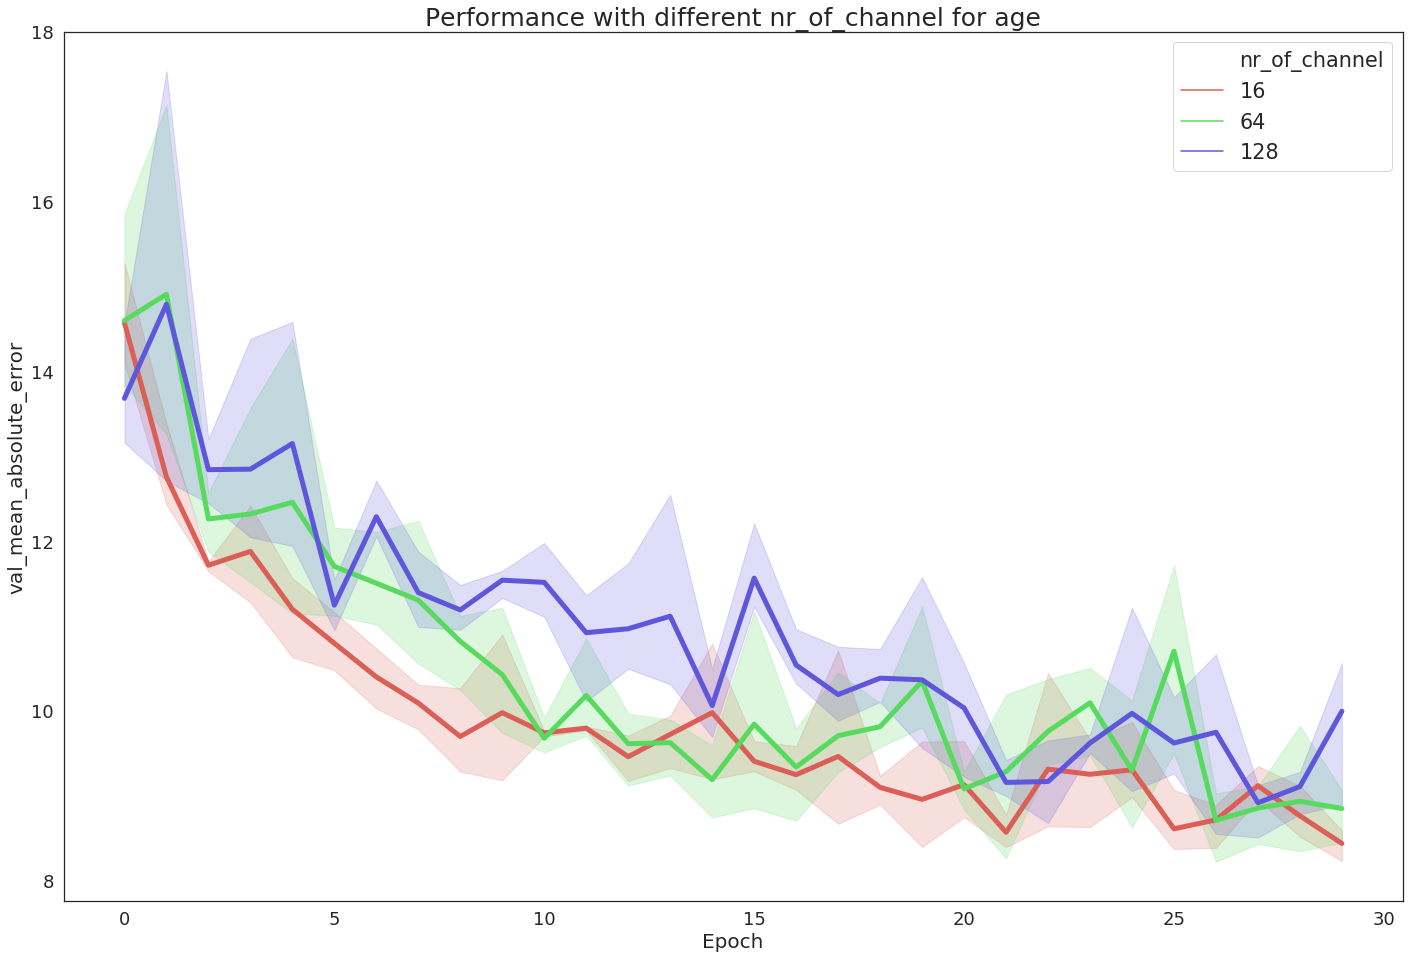

In [10]:
import pandas as pd 
import glob
import re
final = pd.DataFrame()
for file in glob.glob("*testing_ethnic_hidden_neurons_*"):
    seed = re.search("\d(?=(_training\.csv))", file).group(0)  
    value = re.search("\d*(?=(_\d*_training\.csv))", file).group(0)  
    variable = re.search("(?<=ethnic_).*(?=(_\d*_\d*_training\.csv))", file).group(0)  
    df = pd.read_csv(file)
    df[variable]= int(value)
    df['seed']= int(seed)
    final = pd.concat([final,df], axis=0)

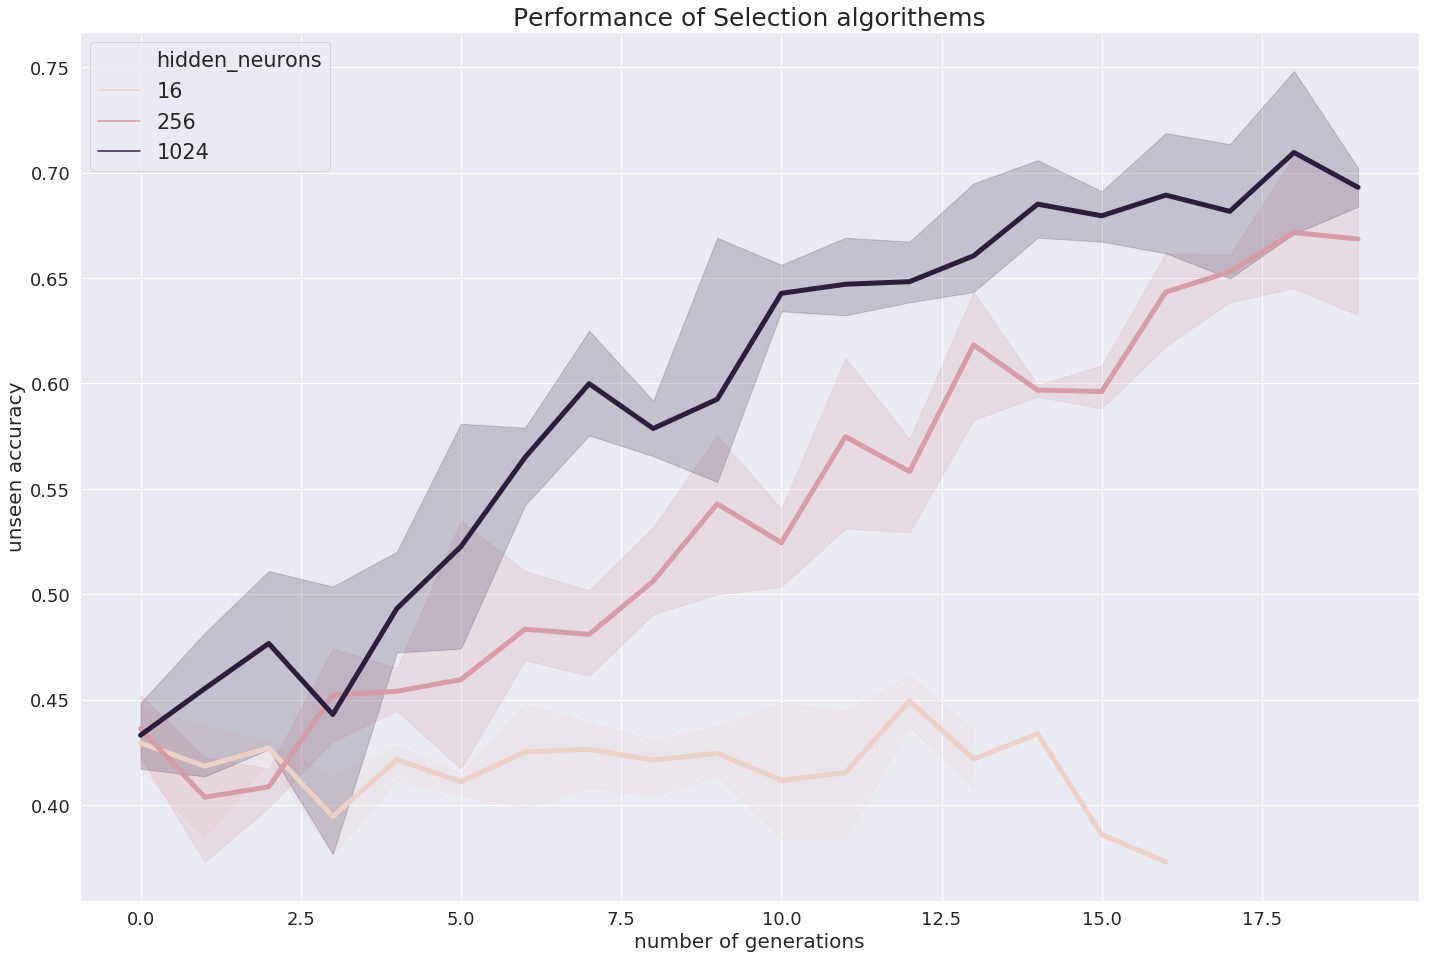

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(24,16)})
ax = sns.lineplot(x="epoch", y="val_acc", data=final, hue="hidden_neurons", linewidth=5.0,legend="full")
ax.set_title('Performance of Selection algorithems', fontsize=25)
ax.legend(frameon=False, loc='lower center',ncol=2, fontsize=20)
ax.set_xlabel("number of generations",fontsize=20)
ax.set_ylabel("unseen accuracy",fontsize=20)
ax.tick_params(labelsize=18)
ax.legend(loc='best',fontsize='xx-large')
fig = ax.get_figure()

